In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

data_dim1 = [1, 2, 3, 4]

data_dim2 = [[5, 4, 7, 5],
             [6, 6, 6, 4],
             [5, 3, 4, 8],
             [7, 2, 3, 6],
             [6, 8, 8, 5]]

loo = LeaveOneOut()

for train_idx, test_idx in loo.split(data_dim1):
    print('train_index:%s,test_index:%s'%(train_idx,test_idx))

for train_idx, test_idx in loo.split(data_dim1):
    
    train_data = [data_dim1[i] for i in train_idx]
    print('train_i:',i)
    test_data = [data_dim1[i] for i in test_idx]
    print('test_i:',i)
    print("train_data: %s, test_data %s" % (train_data, test_data))

In [ ]:
import numpy as np 
import scipy.io as io
data = np.load('../../result/result.npy')
for i in range(120):
    for j in range(120):
        for k in range(120):
            if data[i][j][k] != 0:
                if data[i][j][k] > 0.5:
                    data[i][j][k] = 1
                else:
                    data[i][j][k] = 0;
io.savemat('../../result/result.mat',{'result':data})
print(data)

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

random_data = np.random.randn(10,3)
print(random_data)
print("#"*len(random_data))


class MyDataSet(Dataset):
    def __init__(self, loaded_data):
        self.data = loaded_data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    

custom_dataset = MyDataSet(random_data)

# for i in range(len(custom_dataset)):
#     print(custom_dataset[i])
    

train_size = int(len(custom_dataset) * 0.5)
validate_size = int(len(custom_dataset) * 0.2)
test_size = len(custom_dataset) - validate_size - train_size
train_dataset, validate_dataset, test_dataset = torch.utils.data.random_split(custom_dataset, [train_size, validate_size, test_size])
print(train_dataset)
print(validate_dataset)
print(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False, num_workers=0)
validate_loader = DataLoader(validate_dataset, batch_size=1, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)
print('train_loader')
for i, train_sample in enumerate(train_loader):
    print("{} {}".format(i, train_sample))

print('validate_loader')
for j, validate_sample in enumerate(validate_loader):
    print("{} {}".format(j, validate_sample))
    print('')
print('test_loader')
for k, test_sample in enumerate(test_loader):
    print("{} {}".format(k, test_sample))



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()

x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x),label = 'sinx')
plt.plot(x, np.cos(x),label = 'cosx')
plt.legend()

In [ ]:
import numpy as np
import scipy.io as io

data = io.loadmat('../../Matlab_files/top3d_Model/top3d_Model_8/standard_topModel_8.mat')

data = data['standarddata']
data = data[np.newaxis,:,:,:]
print(data.shape)
np.save('test.npy',data)

In [ ]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
data = np.load('./result.npy')
print(data.shape)
print(data)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if data[i][j][k] > 0.5:
                data[i][j][k] = 1
            else:
                data[i][j][k] =0
io.savemat('./result.mat',{'data':data})



# mycolormap = plt.get_cmap('winter')
# data_max = data.max()
# relativevalue = np.round(data / data_max, 1)
# colorsvalues = mycolormap(relativevalue)
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# ax.set_xlim(0, 150)
# ax.set_ylim(0, 150)
# ax.set_zlim(75, -75)
# ax.voxels(data, facecolors=colorsvalues,edgecolors = 'k', shade = False)

In [ ]:
import numpy as np


In [ ]:
import torch
import torch.nn.functional as F
x1 = torch.randn((6, 6, 6))
# print(x1.shape)
# print(x1)
x = torch.randn((3, 3, 3))
print(x.shape)
print(x)
diffY = torch.tensor(x1.size()[0] - x.size()[0])
diffX = torch.tensor(x1.size()[1] - x.size()[1])
diffZ = torch.tensor(x1.size()[2] - x.size()[2])

x3 = F.pad(x, (diffX // 2, diffX - diffX // 2,
                diffY // 2, diffY - diffY // 2,
                diffZ // 2, diffZ - diffZ // 2))
print(x3.shape)
print(x3)

In [ ]:
import numpy as np
import scipy.io as io
dataindex = np.load('../Matlab_files/dataset/originalmatdata/dataset/generatedata/input/0/detectmatrix.npy')
print(dataindex)
inputdata = np.load('../Matlab_files/dataset/originalmatdata/dataset/formaldata/input/88.npy')
labeldata = np.load('../Matlab_files/dataset/originalmatdata/dataset/formaldata/label/88.npy')
data1 = np.load('../Matlab_files/dataset/dataset（2023.05.04）/input/82.npy')
labeldata1 = np.load('../Matlab_files/dataset/dataset（2023.05.04）/label/82.npy')
print(np.all(inputdata == 0))
print(np.all(labeldata == 0))
print(np.all(data1 == 0))
print(np.all(labeldata1 == 0))
io.savemat('./inputdata.mat',{'inputdata':inputdata})
io.savemat('./labeldata.mat',{'labeldata':labeldata})

In [ ]:
import numpy as np
import math
confusion_ = np.array([0, 5, 7])
confusion = np.array([1, 2 ,3])
beta = 0.5
weight = []
weight_dice = []
for i, n in zip(confusion_, confusion):
    print('i:',i)
    print('n:',n)
    if i == 0:
        weight.append(0)
        weight_dice.append(1)
    else:
        weight_dice.append(1)
        weight.append(((1.0 - beta) / (1.0 - math.pow(beta, n))))

print(weight)
print(weight_dice)

__数据集分类别数量统计__

In [ ]:
import numpy as np
import glob
data_index = glob.glob('../Matlab_files/dataset/originalmatdata/dataset/dataset(05.09)/label/*.npy')
print(len(data_index))
class_0 = 0
class_1 = 0




if __name__ == "__main__":
    for t in range(len(data_index)):
        train_size = int(len(data_index) * 0.9)
        validate_size = int(len(data_index) - train_size)

        data = np.load(data_index[t])
        data = np.squeeze(data)
        # print(data.shape)

        temp_class_0 = 0
        temp_calss_1 = 0
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                for k in range(data.shape[2]):
                    if data[i][j][k] == 0:
                        temp_class_0 += 1
                    else:
                        temp_calss_1 += 1
        class_0 = class_0 + temp_class_0
        class_1 = class_1 + temp_calss_1
    print('class_0_num:',class_0)
    print('class_1_num:',class_1)


In [ ]:
import torch
a = torch.randn(3, 4, 3)
print(a)
temp = torch.argmax(a, dim=0)
print(temp)
print(temp.shape)
NumP = temp.shape[0]*temp.shape[1]*temp.shape[2]
print(NumP)

In [ ]:
import numpy as np

data = np.load

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
np.set_printoptions(threshold=np.inf)
data = np.load('../Data/dataset(positive_negative)/label/positive_label/81.npy')
data = np.squeeze(data).astype(np.int64)
print(data.shape)
# print(data)
data = torch.tensor(data)
print(type(data))
target = F.one_hot(data)
print(target.shape)
torch.set_printoptions(profile='full')
print(target)

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F


target = torch.randint(0, 2, (3, 3, 3))
print(target)

one_hot = F.one_hot(target)
print(one_hot)
print(one_hot.shape)


In [ ]:
import torch
import torch.nn.functional as F

target = torch.randint(0, 2, (4, 4))
print(target)
one_hot = F.one_hot(target)
print(one_hot)
print(one_hot.shape)
data = one_hot.shape[0]
print(data)

In [ ]:
epoches = 10
loss = 0.5
for epoch in range(epoches):
    print("Train Epoch:{} \t Loss:{}".format(epoch, loss))


In [ ]:
import torch
import torch.nn

target = torch.ones([10, 64], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([10, 64], 1.5)  # A prediction (logit)
pos_weight = torch.ones([64])  # All weights are equal to 1
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion(output, target)  # -log(sigmoid(1.5))

In [ ]:
import numpy
import torch
confusion = [0,1,2,3,4,5,6,7]
temp = torch.randint(0, 8, (3, 3, 3))

print(temp)
confusion_ = [torch.sum(temp==i) for i in range(8)]
NumP = temp.shape[0]*temp.shape[1]*temp.shape[2]
weight  = []
weights_dice = []
for i, n in zip(confusion_,confusion):
    if i == 0:
        # weight.append(0)
        # weight.append(((1.0 - beta) / (1.0 - math.pow(beta, n))))
        weight.append((NumP-i)/i)
        weights_dice.append(1)
    else:
        # weight.append(((1.0 - beta) / (1.0 - math.pow(beta, i)))*10000)
        weights_dice.append(1)
        # weight.append(((1.0 - beta) / (1.0 - math.pow(beta, n))))
        # weights_dice.append(1/i**2) # 
        weight.append((NumP-i)/i) # wce
        # weights_dice.append(1)
print(weight)
print(weights_dice)

In [ ]:
import numpy as np
x = np.array([[[[31,20,10],
	        [20,43,30],
	        [40,10,62],
	        [40,60,76]],
	       [[10,72,20],
	        [81,30,40],
	        [97,50,70],
	        [40,50,68]]],
 
	      [[[10,22,10],
	        [20,30,81],
	        [40,10,62],
	        [40,65,30]],
	       [[10,72,20],
	        [81,30,40],
	        [97,50,70],
	        [40,50,68]]]])
print(x.shape)
# print(x)


y1 = np.argmax(x, axis=3)
print('y1',y1)
print(y1.shape)

y2 = np.expand_dims(y1,axis=3)
print(y2)
print(y2.shape)

In [ ]:
import torch

target = torch.ones([10, 64], dtype=torch.float32)  # 64 classes, batch size = 10
# print('target',target)
output = torch.full([10, 64], 1.5)  # A prediction (logit)
print('output',output)
pos_weight = torch.ones([64])  # All weights are equal to 1

criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
loss = criterion(output, target)  # -log(sigmoid(1.5))
print(loss)

In [ ]:
import torch
import torch.nn as nn

bce_loss = nn.BCELoss()

pred = torch.randn(4, 1)  # 预测值
print("pred", pred)
target = torch.rand(4).random_(0, 2)  # 真实类别标签
print("target", target)
print('target.view(4, -1):',target.view(4, -1))
# 将target进行独热编码
onehot_target = torch.eye(2)[target.long(), :]
print("onehot_target", onehot_target)

sigmoid = nn.Sigmoid()
sigmoid_pred = sigmoid(pred)
print("sigmoid_pred", sigmoid_pred)

loss1 = bce_loss(sigmoid_pred, target.view(4, -1))
print('loss1:',loss1)

bce_loss2 = nn.BCEWithLogitsLoss()
loss2 = bce_loss2(pred, target.view(4, -1))
print('loss2:',loss2)

In [ ]:
import torch
from einops import rearrange
a = torch.randn(3, 2, 2)
print('a',a)
output = rearrange(a, ' c h w -> h w c')
print(output.shape)
print('output',output)

In [ ]:
import torch
import torch.nn.functional as nn
import numpy as np
data = np.random.rand(2, 5, 5, 5).astype(np.int64)
print(data)
data = torch.from_numpy(data)
target = nn.one_hot(data)
print(data.shape)

In [ ]:
import torch

x = torch.randn(4, requires_grad=True)
print(x)
print(x.grad)

y = 2 * torch.dot(x , x)
print(y)
y.backward()
x.grad


In [ ]:
import torch
x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)
y.backward()
x.grad
x.grad.zero_()

In [ ]:
import torch
x = torch.arange(4.0, requires_grad=True)
y = torch.dot(x, x)
y.backward()
y.sum().backward()
x.grad

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from  torchnet import meter

n_classes = 3
confusion_matrix = meter.C

In [ ]:
import numpy as np
# np.random.seed(0)
array1 = np.random.randint(0, 2, (3, 3))
print('array1:\n',array1)
array2 = np.random.randint(0, 2, (3, 3))
print('array2:\n',array2)
input = array1.reshape(-1)
target = array2.reshape(-1)
print('input:',input)
print('target:',target)
intersection = (input * target).sum()
print(intersection)
total = (input + target).sum()
print(total)

union = total - intersection

IoU = (intersection) / union
print(IoU)

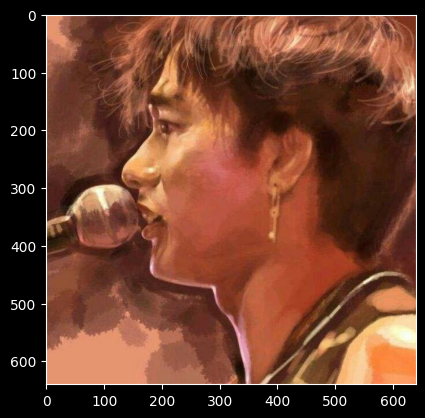

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


data = mpimg.imread('./1.jpg')
plt.imshow(data)




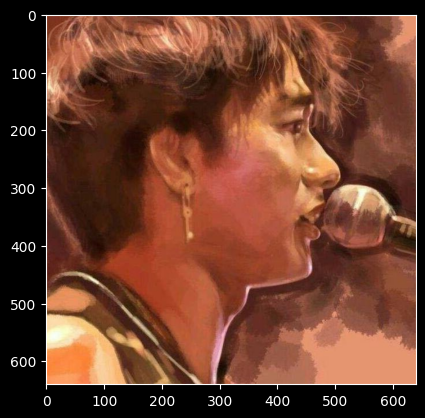

In [11]:
#图片翻转
data1 = np.fliplr(data)
plt.imshow(data1)

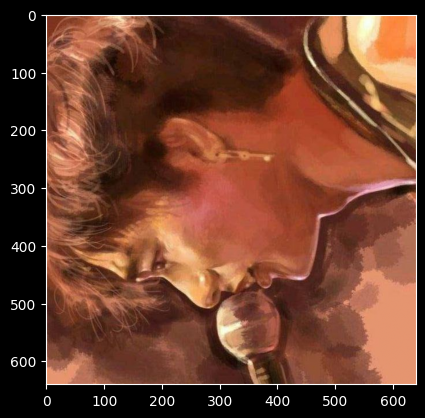

In [18]:
#旋转指定角度
import skimage
rot = skimage.transform.rotate(data, angle=90, mode='reflect')
plt.imshow(rot)

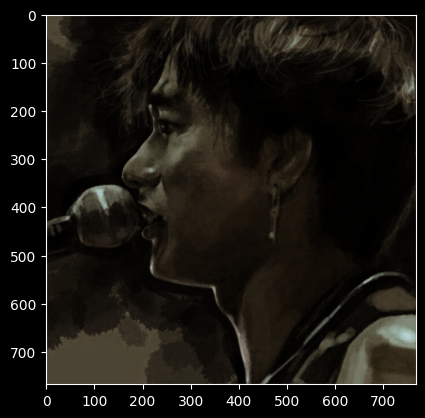

In [25]:
#缩放比例
scale_out = skimage.transform.rescale(data, scale=1.2, mode='constant')
plt.imshow(scale_out)
# scale_out = skimage.transform.rescale(data, scale=0.5, mode='constant')

In [ ]:
import torch
@torch.no_grad()    #函数执行时省略梯度跟踪（gradient tracking）以减小内存消耗
def get_all_preds(model ,loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
        
        preds = model(images)
        all_preds= torch.cat(
            (all_preds, preds)
            ,dim=0
        )

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_pred = get_all_preds(network, prediction_loader)
    

In [ ]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))  # 0.5
print(accuracy_score(y_true, y_pred, normalize=False))  # 2

# 在具有二元标签指示符的多标签分类案例中
print(accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))) 

0.5
2
0.5


[[2 0 1]
 [1 1 1]
 [0 2 0]]


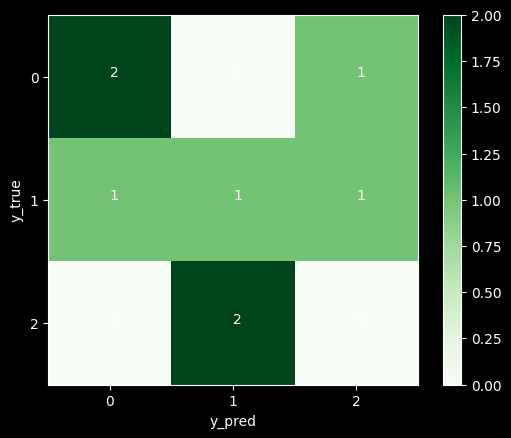

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

trues = [0, 1, 2, 0, 1, 2, 0, 1]
preds = [0, 2, 1, 0, 0, 1, 2, 1]

def get_confusion_matrix(trues, preds):
#   labels = [0,1,2]
  conf_matrix = confusion_matrix(trues, preds)
  return conf_matrix
  
def plot_confusion_matrix(conf_matrix):
  plt.imshow(conf_matrix, cmap=plt.cm.Greens)
  indices = range(conf_matrix.shape[0])
  labels = [0,1,2]
  plt.xticks(indices, labels)
  plt.yticks(indices, labels)
  plt.colorbar()
  plt.xlabel('y_pred')
  plt.ylabel('y_true')
  # 显示数据
  for first_index in range(conf_matrix.shape[0]):
    for second_index in range(conf_matrix.shape[1]):
      plt.text(second_index, first_index, conf_matrix[first_index, second_index])
  plt.savefig('heatmap_confusion_matrix.jpg')
  plt.show()


if __name__ == "__main__":
    conf_matrix = get_confusion_matrix(trues, preds)
    print(conf_matrix)
    plot_confusion_matrix(conf_matrix)

In [11]:
import numpy as np
import glob

dataindex = glob.glob('./dataset_mini_batch/label/test/1/*.npy')
num_0 = 0
num_1 = 0
for t in range(len(dataindex)):
    data = np.load(dataindex[t])
    data = np.squeeze(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            for k in range(data.shape[2]):
                if data[i][j][k] == 0:
                    num_0 += 1
                else:
                    num_1 += 1
print('num_0',num_0)
print('num_1',num_1)

num_0 1765372
num_1 2628


In [10]:
import numpy as np
import glob

dataindex = glob.glob('./dataset_mini_batch/label/test/0/*.npy')
num_0 = 0
num_1 = 0
for t in range(len(dataindex)):
    data = np.load(dataindex[t])
    data = np.squeeze(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            for k in range(data.shape[2]):
                if data[i][j][k] == 0:
                    num_0 += 1
                else:
                    num_1 += 1
print('num_0',num_0)
print('num_1',num_1)

num_0 1768000
num_1 0


In [19]:
import numpy as np
import glob
num_empty = 0
dataindex = glob.glob('./dataset_mini_batch/label/positive_label/*.npy')

for i in range(len(dataindex)):
    # print(i)
    data = np.load(dataindex[t])
    data = np.squeeze(data)
    # print(2)
    if np.all(data==0):
        num_empty += 1
        print(1)
print(num_empty)

0


In [32]:
import numpy as np

data = np.load('./dataset_mini_batch/label/test/nozerolabelindex.npy')
print(data)

[  81   87   92   93  117  123  128  129  303  308  309  339  344  345
  524  525  531  560  561  567  735  740  741  771  776  777  951  956
  957  987  992  993 1172 1173 1179 1208 1209 1215 1383 1388 1389 1419
 1424 1425 1599 1604 1605 1635 1640 1641 1820 1821 1827 1856 1857 1863
 2024 2025 2030 2031 2037 2060 2061 2066 2067 2072 2073 2079 2247 2252
 2253 2259 2283 2288 2289 2295 2457 2462 2463 2468 2469 2475 2493 2498
 2499 2504 2505 2511 2673 2678 2679 2685 2709 2714 2715 2720 2721 2727
 2895 2900 2901 2907 2931 2936 2937 2943 3111 3117 3123 3153 3326 3333
 3338 3339 3345 3362 3374 3375 3381 3542 3549 3554 3555 3561 3578 3590
 3591 3597 3759 3765 3771 3801 3968 3969 3986 3987 3992 3993 4004 4005
 4022 4023 4028 4029 4190 4197 4202 4203 4209 4226 4238 4239 4245 4407
 4413 4419 4449 4622 4625 4628 4631 4658 4661 4662 4664 4667 4668 4839
 4844 4875 4880 5054 5055 5060 5061 5090 5091 5096 5097 5264 5270 5271
 5300 5306 5307 5487 5492 5523 5528 5702 5703 5709 5738 5739 5745 5912
 5918 

In [36]:
import numpy as np
import scipy.io as io
data = np.load('./dataset_mini_batch/label/positive_label/4631.npy')
# print(data)
data = np.squeeze(data)
print(np.all(data==0))
io.savemat('./dataset_mini_batch/label/test/4631label.mat',{'labeldata':data})
data1 = np.load('./dataset_mini_batch/input/positive_input/4631.npy')
data1 = np.squeeze(data1)
io.savemat('./dataset_mini_batch/label/test/4631input.mat',{'inputdata':data1})

False


In [37]:
import numpy as np

data = np.load('./dataset_mini_batch/input/positive_input/4631.npy')
data = np.squeeze(data)
print(np.all(data==0))

True


In [41]:
import numpy as np

data = np.load('../../Matlab_files/dataset/originalmatdata/dataset/dataset(05.09)/input/4631.npy')
print(data.shape)
data = np.squeeze(data)
print(data.shape)
print(np.all(data==0))
data1 = np.load('../../Matlab_files/dataset/originalmatdata/dataset/dataset(05.09)/label/4631.npy')
data1 = np.squeeze(data1)
print(np.all(data1==0))

(1, 20, 20, 20)
(20, 20, 20)
True
False


In [53]:
import numpy as np
import scipy.io as io

inputdata = io.loadmat('../../Matlab_files/dataset/originalmatdata/dataset/matdata/input/20.mat') 
inputdata = inputdata['data']
# print(inputdata)
print(inputdata.shape)
labeldata = io.loadmat('../../Matlab_files/dataset/originalmatdata/dataset/matdata/label/20.mat')
labeldata = labeldata['defectdata']
print(labeldata.shape)

(15, 90, 15)
(120, 120, 120)


In [50]:
import numpy as np

input = np.load('../../Matlab_files/dataset/originalmatdata/dataset/generatedata/input/0/detectmatrix.npy')
print('input\n',input)
label = np.load('../../Matlab_files/dataset/originalmatdata/dataset/generatedata/label/0/detectmatrix.npy')
print('label:\n',label)

input
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  81  82   0   0   0   0  87  88   0   0
   0   0  93  94   0   0   0   0  99 100   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 117 118   0   0   0   0 123 124   0   0
   0   0 129 130   0   0   0   0 135 136   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
label:
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   

In [65]:
import numpy as np
import scipy.io as io
inputdata = io.loadmat('../../Matlab_files/dataset/originalmatdata/dataset/matdata/input/21.mat')
inputdata = inputdata['inputdata']
print(inputdata.shape)

labeldata = io.loadmat('../../Matlab_files/dataset/originalmatdata/dataset/matdata/label/21.mat')
labeldata = labeldata['defectdata']
print(labeldata.shape)
labeldata = labeldata.transpose(2, 0, 1)
io.savemat('../../Matlab_files/dataset/originalmatdata/dataset/matdata/label/21.mat',{'defectdata':labeldata})

(120, 120, 120)
(120, 120, 120)


In [21]:
import numpy as np
import os

dataindex = '../Data/dataset（切割数据集-整体汇总编号）/label/'
num_1 = 0
nozeroarray = []
for t in range(1, 9937):
    data = np.load(os.path.join(dataindex, str(t)+'.npy'))
    if np.all(data == 0):
        continue
    else:
        nozeroarray.append(t)
        
        num_1 += 1
print('num_1:',num_1)
print('nozeroarray:',np.array(nozeroarray))

num_1: 317
nozeroarray: [  82   88   93   94  118  124  129  130  304  309  310  340  345  346
  525  526  532  561  562  568  736  741  742  772  777  778  952  957
  958  988  993  994 1173 1174 1180 1209 1210 1216 1384 1389 1390 1420
 1425 1426 1600 1605 1606 1636 1641 1642 1821 1822 1828 1857 1858 1864
 2025 2026 2031 2032 2038 2061 2062 2067 2068 2073 2074 2080 2248 2253
 2254 2260 2284 2289 2290 2296 2458 2463 2464 2469 2470 2476 2494 2499
 2500 2505 2506 2512 2674 2679 2680 2686 2710 2715 2716 2721 2722 2728
 2896 2901 2902 2908 2932 2937 2938 2944 3112 3118 3124 3154 3327 3334
 3339 3340 3346 3363 3375 3376 3382 3543 3550 3555 3556 3562 3579 3591
 3592 3598 3760 3766 3772 3802 3969 3970 3987 3988 3993 3994 4005 4006
 4023 4024 4029 4030 4191 4198 4203 4204 4210 4227 4239 4240 4246 4408
 4414 4420 4450 4617 4618 4635 4636 4642 4653 4654 4671 4672 4678 4840
 4845 4876 4881 5055 5056 5061 5062 5091 5092 5097 5098 5265 5271 5272
 5301 5307 5308 5488 5493 5524 5529 5703 5704 5710 57

In [4]:
import numpy as np
import glob
inputdataindex = '../Data/dataset（切割数据集-整体汇总编号）/input/*.npy'
print()
for n in range(len(inputdataindex)):
    print(n)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
